# Time Crystal Simulation

## General Setup

In [4]:
from time_crystal_setup import *

Cores = 16

### Parameters

In [3]:
n = 6
tau = 0.5
gamma =0.1
omega = 2*np.pi
T = 2*np.pi/omega
epsilon = gamma/T
lamb = gamma/T
J = tau/T
h = 2*(np.pi/2 + epsilon)/T
h_bar = 1

NameError: name 'np' is not defined

## Define Functions

In [27]:
def QubitOperation(U,i,n):
    Q = tensor(qeye(2**(i-1)),U,qeye(2**(n-i)))
    return Q

def PauliX(i,n):
    X = Qobj(QubitOperation(sigmax(),i,n),dims=[[2**n],[2**n]])
    return X

def PauliY(i,n):
    Y = Qobj(QubitOperation(sigmay(),i,n),dims=[[2**n],[2**n]])
    return Y

def PauliZ(i,n):
    Z = Qobj(QubitOperation(sigmaz(),i,n),dims=[[2**n],[2**n]])
    return Z

def PauliP(i,n):
    P = (PauliX(i,n) + 1j*PauliY(i,n))/2
    return P

def PauliM(i,n):
    M = (PauliX(i,n) - 1j*PauliY(i,n))/2
    return M

def zeros(n):
    return Qobj(np.zeros((2**n,2**n)),dims=[[2**n],[2**n]])

def H2_coeff(t,args):
    omega = args['omega']
    h = args['h']
    return -h*np.cos(omega*t/2)**2

In [28]:
H0 = PauliY(1,n) + PauliZ(1,n)
for i in tqdm(range(2,n+1)):
    H0 = H0 + PauliY(i,n) + PauliZ(i,n)
H1 = (PauliZ(1,n) * PauliZ(2,n))
for i in tqdm(range(2,n)):
    H1 = H1 + (PauliZ(i,n) * PauliZ(i+1,n))
H2 = PauliX(1,n)
for i in tqdm(range(2,n+1)):
    H2 = H2 + PauliX(i,n)
EX = (1/n)*PauliX(1,n)
for i in tqdm(range(2,n+1)):
    EX = EX + (1/n)*PauliX(i,n)
EY = (1/n)*PauliY(1,n)
for i in tqdm(range(2,n+1)):
    EY = EY + (1/n)*PauliY(i,n)
EZ = (1/n)*PauliZ(1,n)
for i in tqdm(range(2,n+1)):
    EZ = EZ + (1/n)*PauliZ(i,n)

100%|██████████| 5/5 [00:00<00:00, 1822.82it/s]


## Solver Configuration

In [31]:
tmax = 8
dt = 0.01
steps = int(tmax//dt)
#print(steps)
t = np.linspace(0.0, tmax, steps)

psi0 = Qobj((1,1j)/np.sqrt(2))
psi0T = Qobj(tensor(psi0,psi0))

for i in range(1,n-1):
    psi0T = tensor(psi0,psi0T)

psi0T = Qobj(psi0T,dims=[[2**n],1])

H = [lamb*H0,-J*H1,[H2, H2_coeff]]

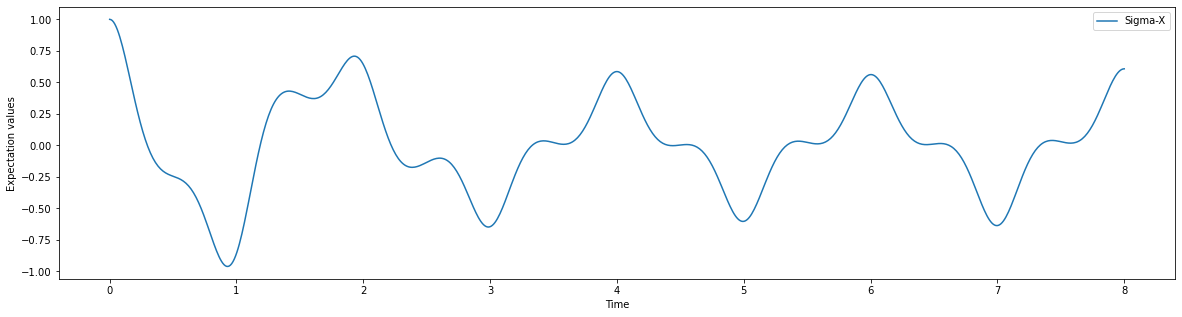

In [32]:
result = sesolve(H, psi0T, t, [EX,EY,EZ],args = {'h': h, 'omega': omega})
fig, ax = plt.subplots()
#ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
#ax.plot(result.times, result.expect[2])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-X", "Sigma-Y", "Sigma-Z"))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.show()

### Iterator

#output_data = np.vstack((result.times, result.expect[1]))
#file_data_store('Results/' + str(n) + '_tau=' + str(tau) + '_gamma='+ str(gamma) +'.csv', output_data.T, numtype="real")
#def solver(n):  
    H0 = PauliY(1,n) + PauliZ(1,n)
    for i in tqdm(range(2,n+1)):
        H0 = H0 + PauliY(i,n) + PauliZ(i,n)

    H1 = (PauliZ(1,n) * PauliZ(2,n))
    for i in range(2,n):
        H1 = H1 + (PauliZ(i,n) * PauliZ(i+1,n))

    H2 = PauliX(1,n)
    for i in tqdm(range(2,n+1)):
        H2 = H2 + PauliX(i,n)

    EX = (1/n)*PauliX(1,n)
    for i in tqdm(range(2,n+1)):
        EX = EX + (1/n)*PauliX(i,n)

    EY = (1/n)*PauliY(1,n)
    for i in tqdm(range(2,n+1)):
        EY = EY + (1/n)*PauliY(i,n)

    EZ = (1/n)*PauliZ(1,n)
    for i in tqdm(range(2,n+1)):
        EZ = EZ + (1/n)*PauliZ(i,n)
    
    
    t = np.linspace(0.0, 20, 2000)

    psi0 = Qobj((1,1j)/np.sqrt(2))
    psi0T = Qobj(tensor(psi0,psi0))

    for i in range(1,n-1):
        psi0T = tensor(psi0,psi0T)

    psi0T = Qobj(psi0T,dims=[[2**n],1])

    H = [lamb*H0,-J*H1,[H2, H2_coeff]]

    result = sesolve(H, psi0T, t ,[EX,EY,EZ],args = {'h': h, 'omega': omega}, progress_bar=True)

    output_data = np.vstack((result.times, result.expect[1]))
    return n,file_data_store(str(n) + '_tau=0.5_gamma=0.05.csv', output_data.T, numtype="real")
#for i in range(2,17):
        solver(i)

## Floquet States

### Floquet Quasienergies

100%|██████████| 1000/1000 [00:04<00:00, 208.56it/s]


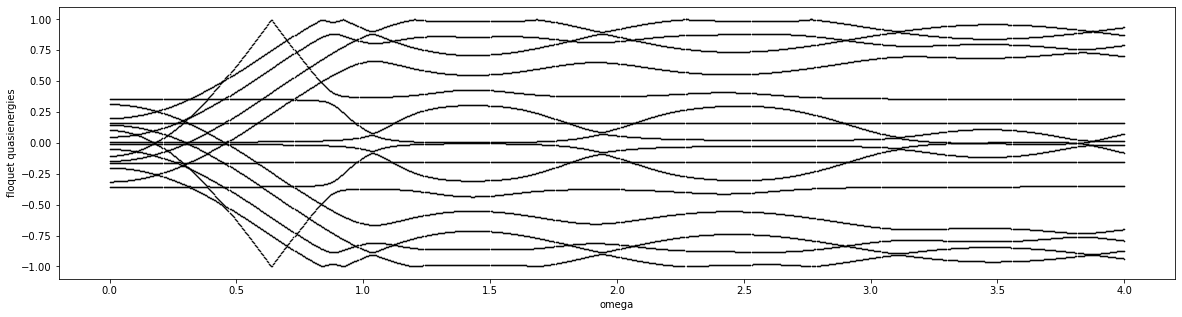

In [64]:
hmax=1
hstep=1000
omegamin=0
omegamax=4
omegastep=1000

list = np.linspace(omegamin,omegamax,omegastep);
q_energies = np.zeros((len(list), 2**n))

for i in tqdm(range(int((omegastep/omegamax*omegamin)),omegastep)):
    f_modes_0, f_energies = floquet_modes(H, T ,sort=True ,args = {'h': h, 'omega': omegamax/omegastep*i})
    q_energies[i,:] = f_energies

fig = plt.figure();
for i in range(2**n):
    plt.scatter(list, q_energies[:,i], color = 'k', s=0.4);

plt.xlabel('omega');
plt.ylabel('floquet quasienergies');
fig.set_figheight(5)
fig.set_figwidth(20)

In [37]:
tmax = 60
dt = 0.01

f_modes_0, f_energies = floquet_modes(H, T,args = {'h': h, 'omega': omega})
f_modes_t = floquet_modes_t(f_modes_0, f_energies, 5.2, H, T,args = {'h': h, 'omega': omega} )
psi0=basis(2**n)
f_coeff = floquet_state_decomposition(f_modes_0, f_energies, psi0)
steps = int(tmax//dt)
t = np.linspace(0.0, tmax, steps)
trand = 10 * np.random.rand()
psi_t = floquet_wavefunction_t(f_modes_0, f_energies, f_coeff, trand, H, T, args = {'h': h, 'omega': omega})

In [38]:
#p_ex = np.zeros(len(t));
#for i, j in enumerate(t):
#    psi_t = floquet_wavefunction_t(f_modes_0, f_energies, f_coeff, j, H, T, args = {'h': h, 'omega': omega});
#    p_ex[i] = expect(num(2**n), psi_t);

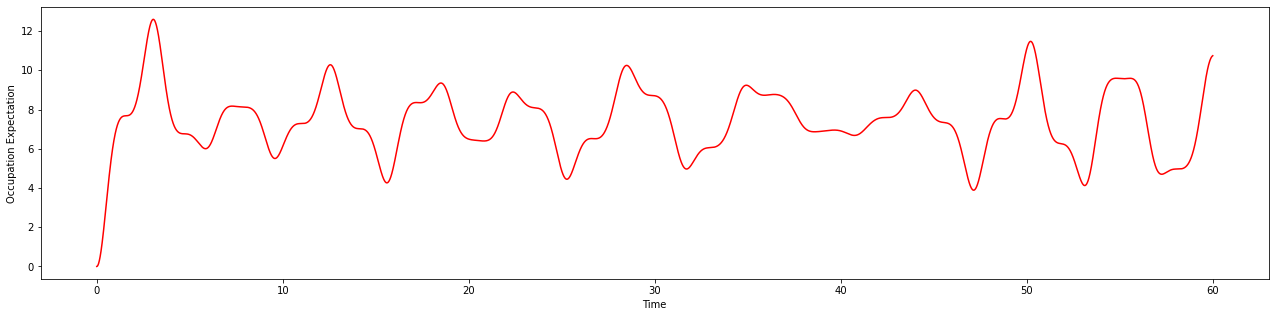

In [41]:
p_ex_ref = mesolve(H, psi0, t, [] ,[num(2**n)], args = {'h': h, 'omega': omega}).expect[0]
fig = plt.figure();
#plt.plot(t, real(p_ex),     'ro', t, 1-real(p_ex),     'bo')
plt.plot(t, np.real(p_ex_ref), 'r');
plt.xlabel('Time');
plt.ylabel('Occupation Expectation');
fig.set_figheight(5);
fig.set_figwidth(22);